# 05-01 - Entropy and Information

*May 22 2024*  

We implement and explore the entropy of random variables and introduce the Kullback-Leibler divergence between to probability mass functions.

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy as sp

from scipy.special import loggamma
from scipy.special import binom

plt.style.use('default')
sns.set_style("whitegrid")

In [2]:
def log2(x):
    if x == 0:
        return 0
    else:
        return np.log2(x)

def entropy(P):
    """calculates entropy in bits of a random variable 
    based on probability mass function P"""
    entropy = 0.0
    for x in P:
        entropy -= P[x] * log2(P[x])
    return entropy

In [3]:
P = {'Heads': 0.5, 'Tails': 0.5}
entropy(P)

1.0

In [4]:
P = {'Heads': 0, 'Tails': 1}
entropy(P)

0.0

In [5]:
P = {'Heads': 0.1, 'Tails': 0.9}
entropy(P)

0.4689955935892812

Text(0, 0.5, 'H(p)')

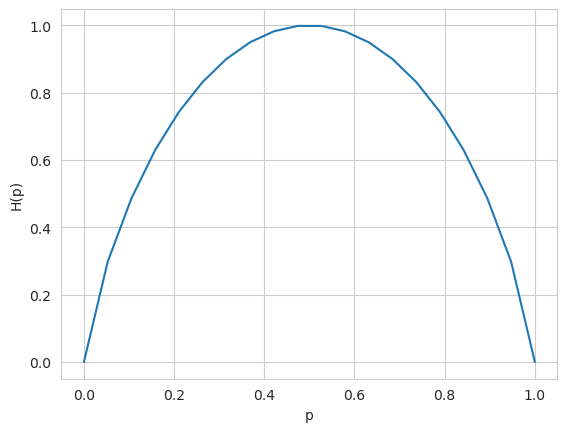

In [6]:
entropies = [entropy({'A': p, 'B': 1-p}) for p in np.linspace(0,1,20)]
probs = np.linspace(0,1,20)

plt.plot(probs, entropies)
plt.xlabel('p')
plt.ylabel('H(p)')

### Relative entropy and Kullback–Leibler divergence

As shown above, entropy can be thought as a measure for the expected "surprise" if we observe an outcome of a random event, or - equivalently - a measure for our lack of knowledge about the outcome of a random event. In general, our lack of knowledge is maximal if we have no prior knowledge whatsoever about the outcome, which is the case if all outcomes are equally probable. In this case, the entropy simply corresponds to the logarithm of the number of possible outcomes.

So far, we have considered the entropy of a single probability distribution. However, we can also consider the entropy of a probability distribution, say $P(k)$, relative to another probability distribution $Q(k)$. The idea is that we want to capture the expected surprise about the outcome of random events with an actual probability distribution $P(k)$, when our model for the outcome of random events is given by $Q(k)$.

The relative entropy (also called the Kullback-Leibler divergence) **from Q to P** for a discrete random variable with outcomes $i$ is given as: 

$$ D_{\text{KL}}(P \| Q) := - \sum_{i} P(i) \cdot \log \frac{Q(i)}{P(i)}$$

We can implement it in python as follows:

In [11]:
def relative_entropy(P, Q):
    relative_ent = 0
    for i in range(len(P)):
        relative_ent -= P[i] * log2(Q[i]/(P[i] + 1e-10))
    return relative_ent

Clearly, if $P$ and $Q$ are identical, the expected surprise is zero as the observed outcomes perfectly correspond to our model. 

In [12]:
relative_entropy([0.5, 0.5], [0.5, 0.5])

2.8853903208047116e-10

If we use a model where the two outcomes are equiprobable ($Q$) but the actual probabilities are strongly concentrated on one of the events, we obtain a relative entropy that is close to one bit.

In [9]:
relative_entropy([0.99999, 0.00001], [0.5, 0.5])

0.9998194767169819

Note that the relative entropy is not defined if we have $P(i)=0$ while $Q(i)$ is not zero (due to the fraction in the definition).

In [10]:
relative_entropy([1, 0], [0.5, 0.5])

ZeroDivisionError: float division by zero

We also note that the relative entropy is not symmetric, i.e. we get a different value if we exchange $P$ and $Q$. This can be intuitively understood if we consider that our model for the event is given by $Q$. If our assumption is that one of the two events are almost impossible, our surprisal to actually see this (almost impossible) outcome is much larger than seeing an outcome more often than we would have expected based on a uniform assumption.

In [13]:
relative_entropy([0.5, 0.5], [0.99999, 0.00001])

7.304827451018217

We can get even larger values if we make the event less likely in our model $Q$.

In [14]:
relative_entropy([0.5, 0.5], [1-1e-30, 1e-30])

48.82892142359897

### Entropy and Kullback-Leibler Divergence in scipy

We can use `scipy.stats.entropy` to compute the (relative) entropy for a given probability mass function. The probability mass function is passed as an array-like object:

In [15]:
sp.stats.entropy([0.5, 0.5])

0.6931471805599453

We note that `scipy` uses the natural logarithm for the entropy definition by default, which means that the function returns entropy in the unit `nats` rather than `bits`. We can pass `base=2` to return bits:

In [16]:
sp.stats.entropy([0.5, 0.5], base=2)

1.0

We we pass a second array, the entries will be interpreted as probabilities $Q$ and the function returns the relative entropy (Kullback-Leibler divergence) from $Q$ to $P$.

In [17]:
sp.stats.entropy([0.99, 0.01], [0.5, 0.5], base=2)

0.9192068641040888

In [18]:
sp.stats.entropy([0.5, 0.5], [0.99, 0.01], base=2)

2.32917787973492